In [1]:
# Importing imp libs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re


In [2]:
#importing the data
df = pd.read_csv("election2024.csv",  sep=',')

print(f'No of rows in the data {df.shape}')
df.head()

No of rows in the data (1600, 16)


,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [3]:
# Data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [4]:
df.isnull().sum()

id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64

In [5]:
df.columns

Index(['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type',
       'company_type', 'weight1'],
      dtype='object')

In [6]:
df.sex.value_counts()

sex
female    843
male      757
Name: count, dtype: int64

C:\Users\sredekar\AppData\Local\Temp\ipykernel_544\2981046415.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='age', shade=True, palette='viridis')
C:\Users\sredekar\AppData\Local\Temp\ipykernel_544\2981046415.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df, x='age', shade=True, palette='viridis')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


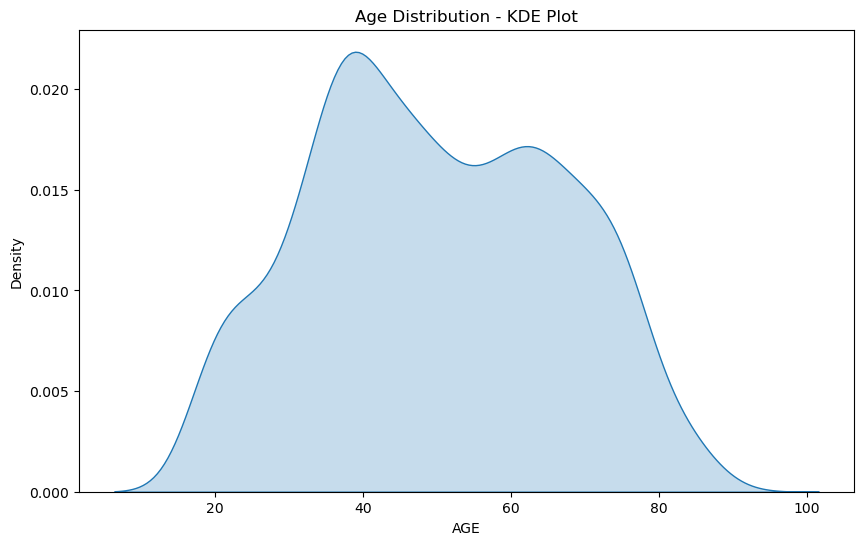

In [7]:
# What is the distribution of age among heart Lung cancer patients in the dataset?

# Plotting the KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='age', shade=True, palette='viridis')


# Adding title and labels
plt.title('Age Distribution - KDE Plot')
plt.xlabel('AGE')
plt.ylabel('Density')

# Display the plot
plt.show()



#### With age disbn we can see cancer is more in People with age between 30-40. But we need to see the cancer rate to get clear picture

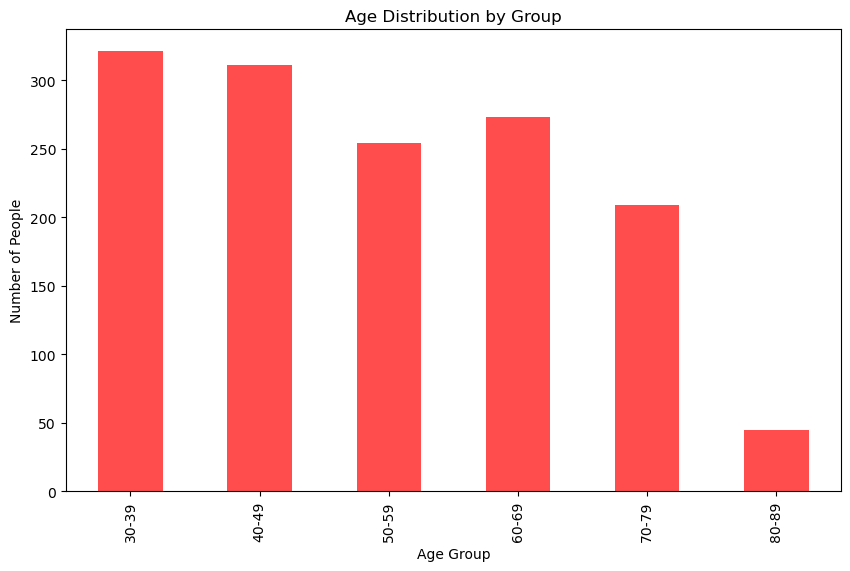

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Define age bins
bins = [30, 40, 50, 60, 70, 80, 90]
labels = ['30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

# Assuming df is already defined and contains an 'age' column
# Add age bins to DataFrame
df['age_bin'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Count the number of occurrences in each bin
age_bin_counts = df['age_bin'].value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
age_bin_counts.plot(kind='bar', color='red', alpha=0.7)

# Adding title and labels
plt.title('Age Distribution by Group')
plt.xlabel('Age Group')
plt.ylabel('Number of People')

# Display the plot
plt.show()


In [9]:
df.columns

Index(['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type',
       'company_type', 'weight1', 'age_bin'],
      dtype='object')

In [10]:
df.company_type.unique()

array(['farming', 'trade', 'law enforcement agency', nan,
       'tech, programming, communications', 'refused to answer',
       'industry, manufacturing', 'other',
       'housing and communal services', 'finances', 'education',
       'healthcare', 'state administration', 'culture, sports',
       'transportation, storage',
       'Сфера услуг, сервиса, бытового обслуживания Включает в том числе: Прачечная/химчистка, ремонт мебели, часов, ювелирны...',
       'catering, restaurants', 'construction, architecture',
       'hard to say', 'entertainment, tourism', 'social services',
       'media'], dtype=object)

In [11]:
## Preprocessing

mapping = {'village':'village', 'city with population of less than 50k':'CityWithPop<50K',
       'city with population of 1 million and higher':'CityWithPop>1M',
       'city with population of 50-100k':'CityWithPop50K-100K',
       'city with population of 100-500k':'CityWithPop100K-500K', 'settlement':'settlement',
       'city with population of 500-950k':'CityWithPop500K-950K'}

df['type_of_city'] = df['type_of_city'].map(mapping)

mapping = {'nan':'NONE', 'housing and communal services':'HousingCommunal',
       'law enforcement agency':'law enforcement',
       'Сфера услуг, сервиса, бытового обслуживания Включает в том числе: Прачечная/химчистка, ремонт мебели, часов, ювелирны...':'other',
       'catering, restaurants':'catering/restaurants', 'construction, architecture':'construction/architecture',
       'entertainment, tourism':'entertainment/tourism','industry, manufacturing':'manufacturing',
          'tech, programming, communications':'tech/programming'}

df['company_type'] = df['company_type'].map(mapping).fillna(df['company_type'])

mapping = {'bachelor degree':'bachelor', 'incomplete school education':'incomplete',
       'no school education':'no education'}

df['education'] = df['education'].map(mapping).fillna(df['education'])




In [45]:
df.columns

Index(['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type',
       'company_type', 'weight1', 'age_bin', 'tag'],
      dtype='object')

C:\Users\sredekar\AppData\Local\Temp\ipykernel_544\1420666425.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=df[var], shade=True, palette='viridis')
C:\Users\sredekar\AppData\Local\Temp\ipykernel_544\1420666425.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df, x=df[var], shade=True, palette='viridis')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


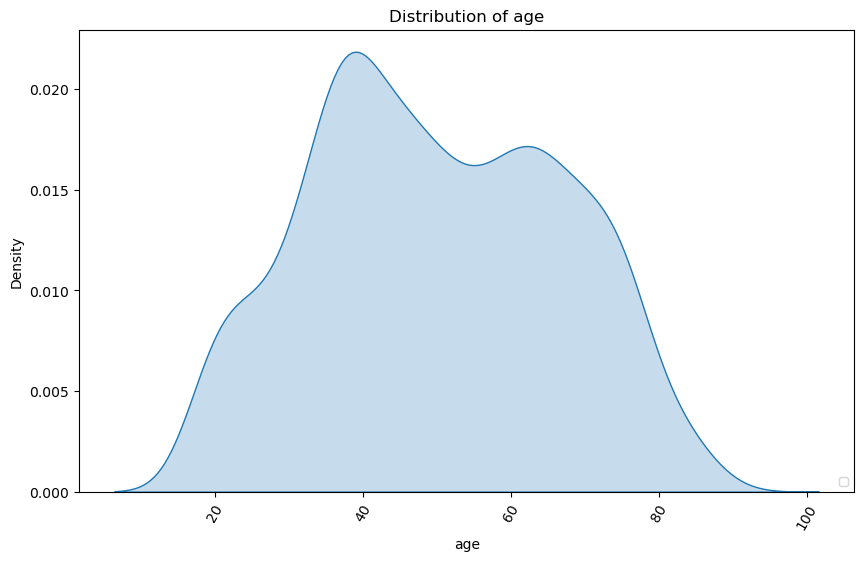

C:\Users\sredekar\AppData\Local\Temp\ipykernel_544\1420666425.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=df[var], shade=True, palette='viridis')
C:\Users\sredekar\AppData\Local\Temp\ipykernel_544\1420666425.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df, x=df[var], shade=True, palette='viridis')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


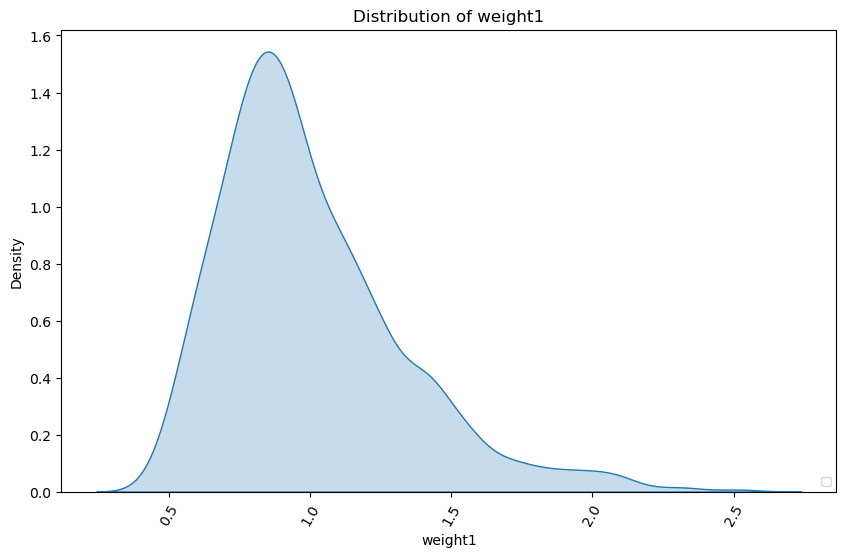

In [13]:
# Working with Num variables

num_columns = df.select_dtypes(include=['number'])

for var in num_columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x=df[var], shade=True, palette='viridis')
    plt.title(f'Distribution of {var}')
    plt.legend(loc='lower right', fontsize='small')
    plt.xticks(rotation=60)
    plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


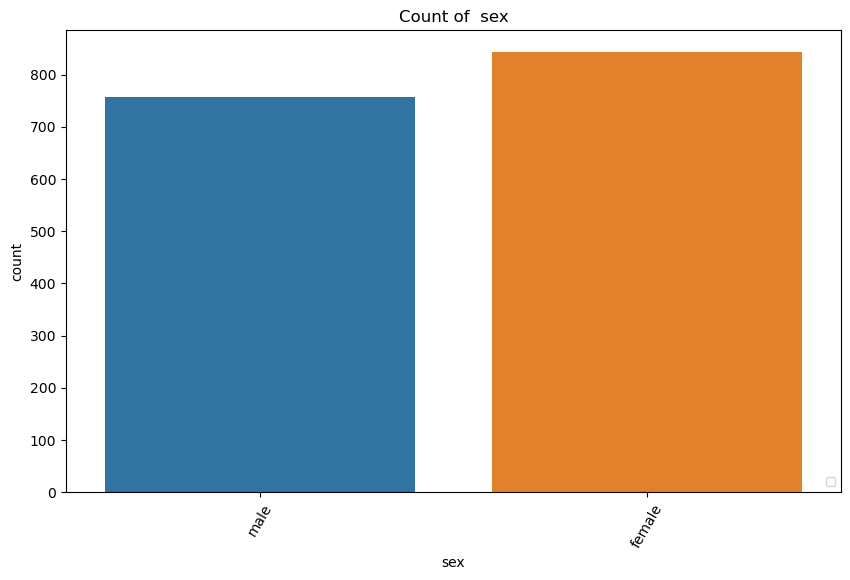

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


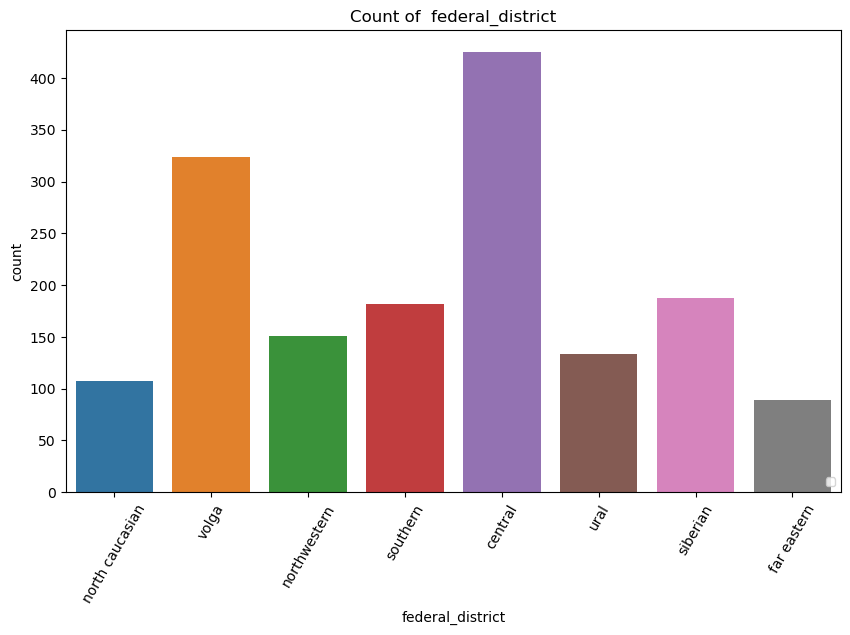

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


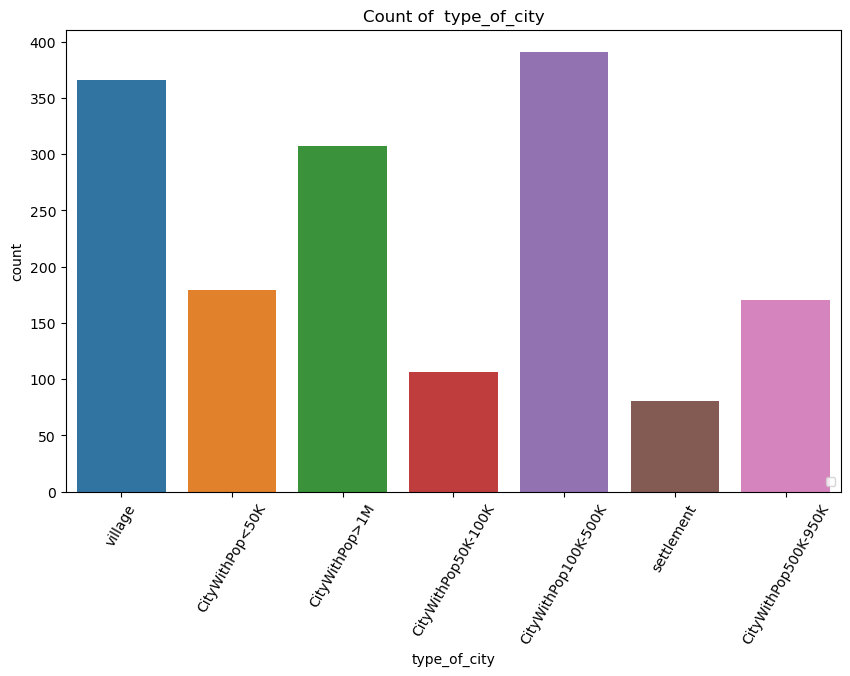

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


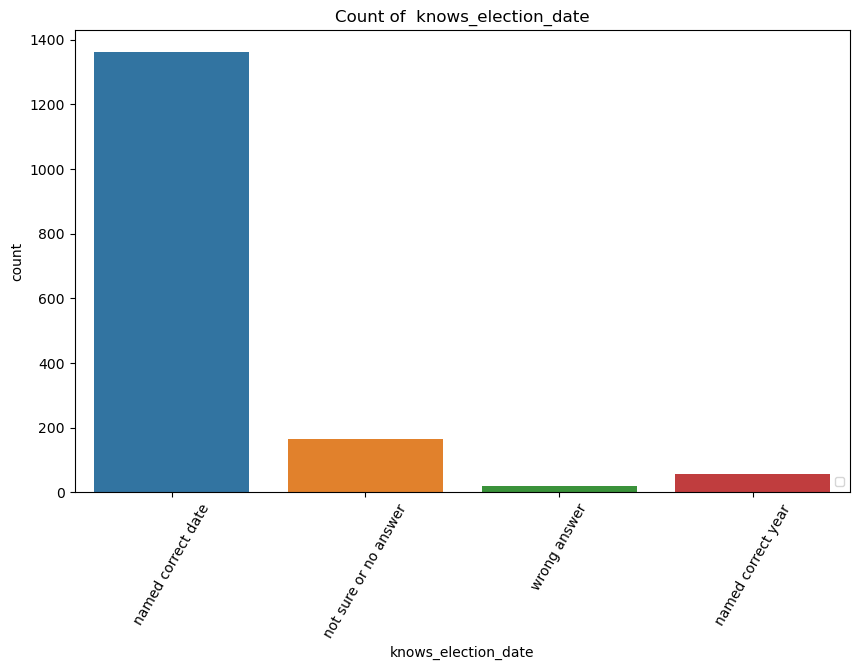

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


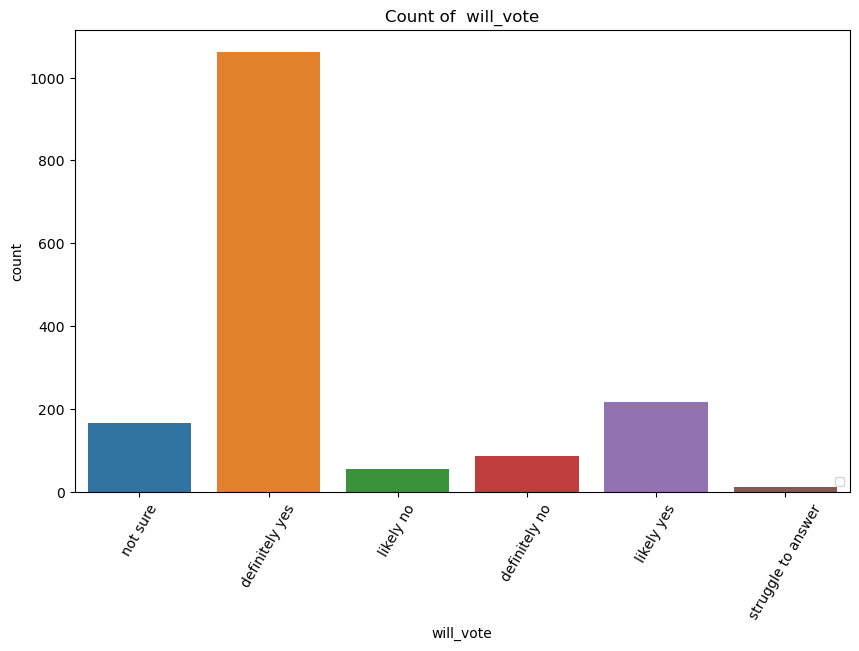

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


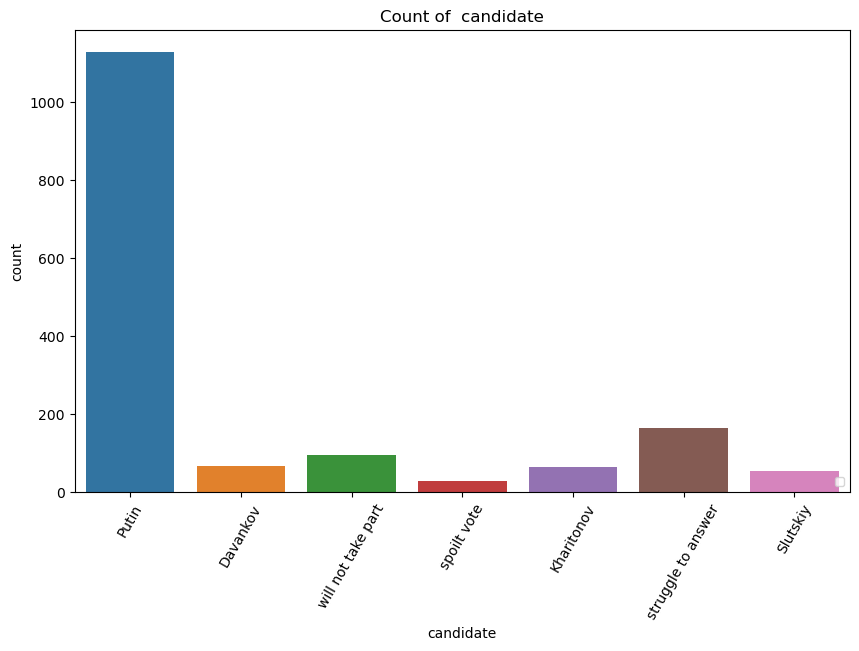

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


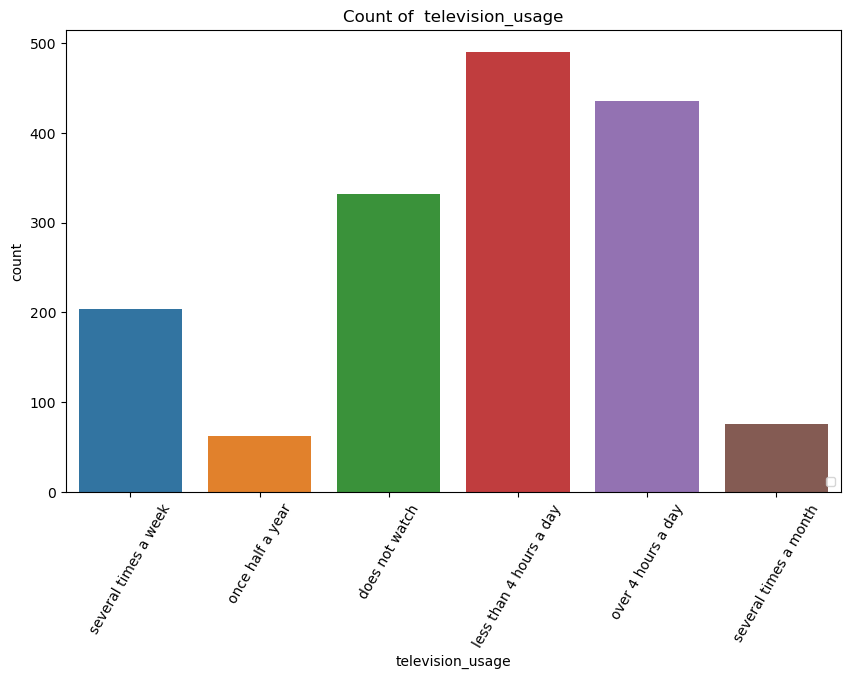

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


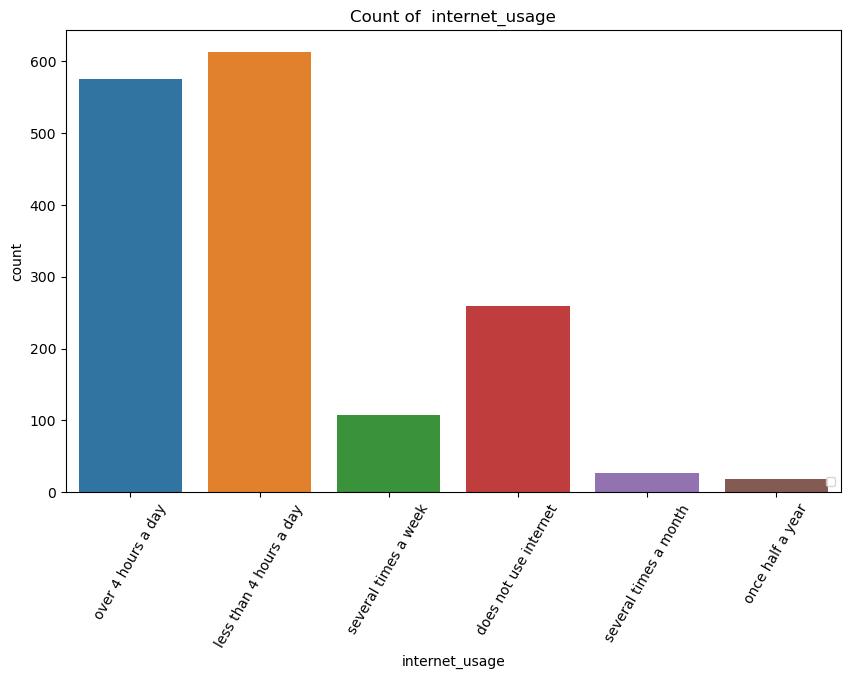

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


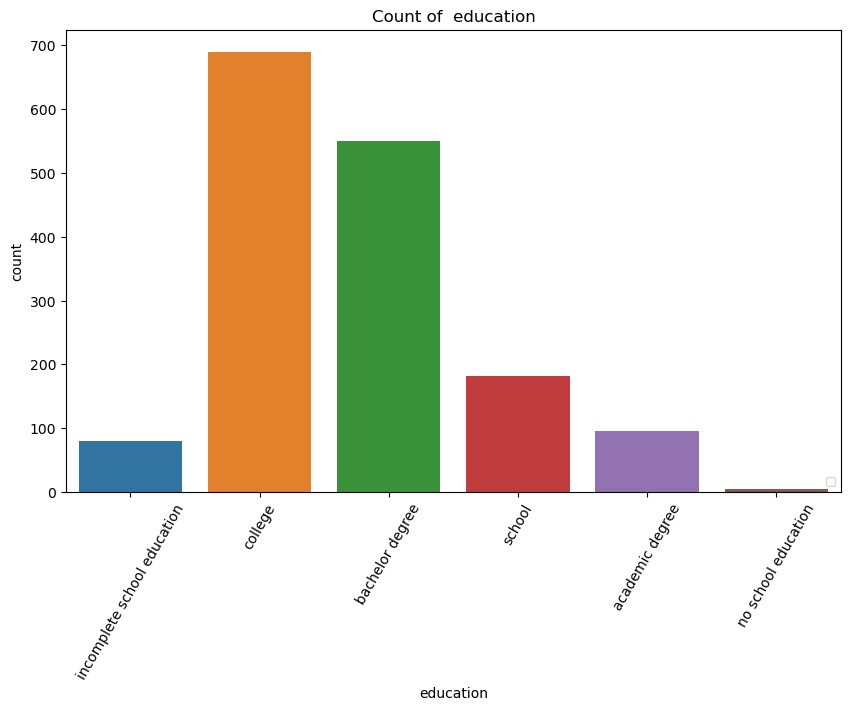

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


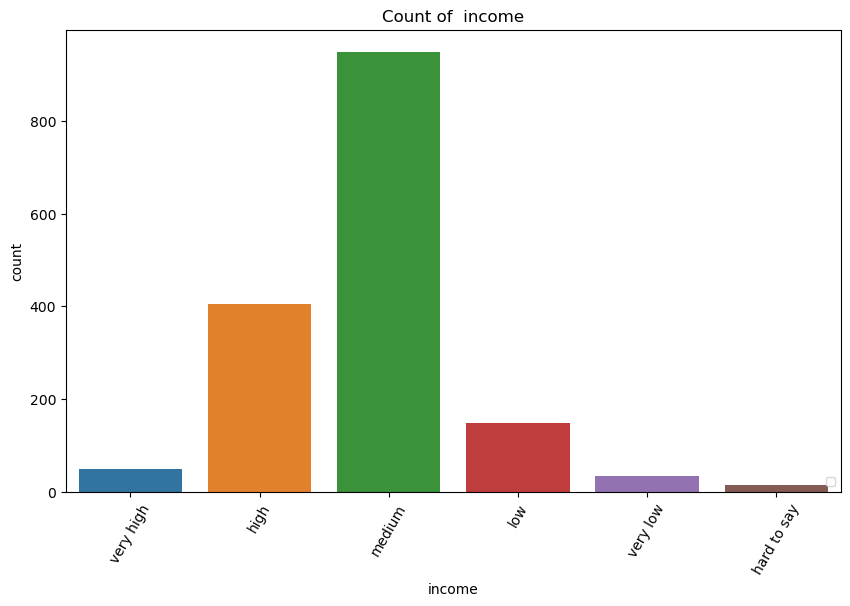

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


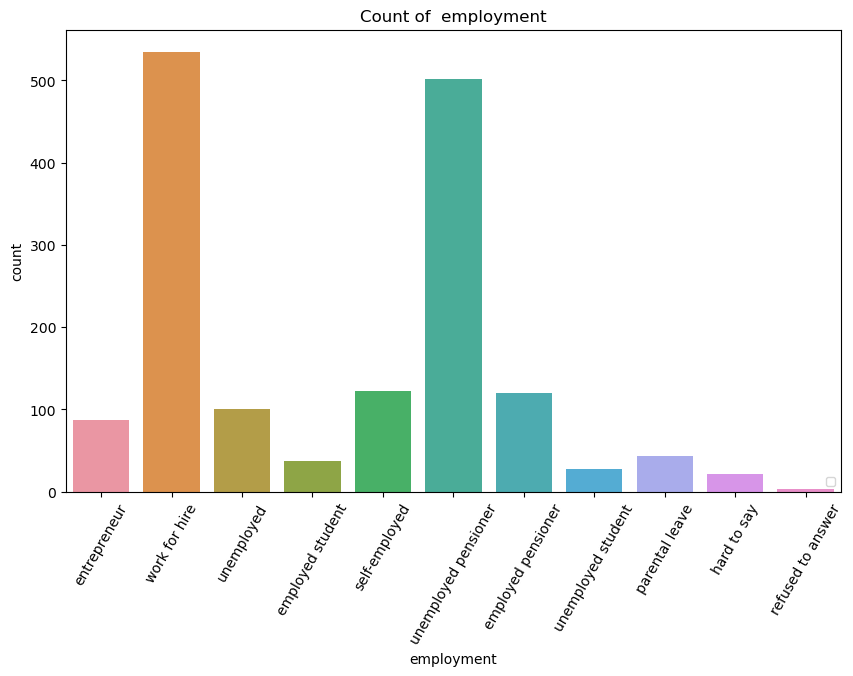

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


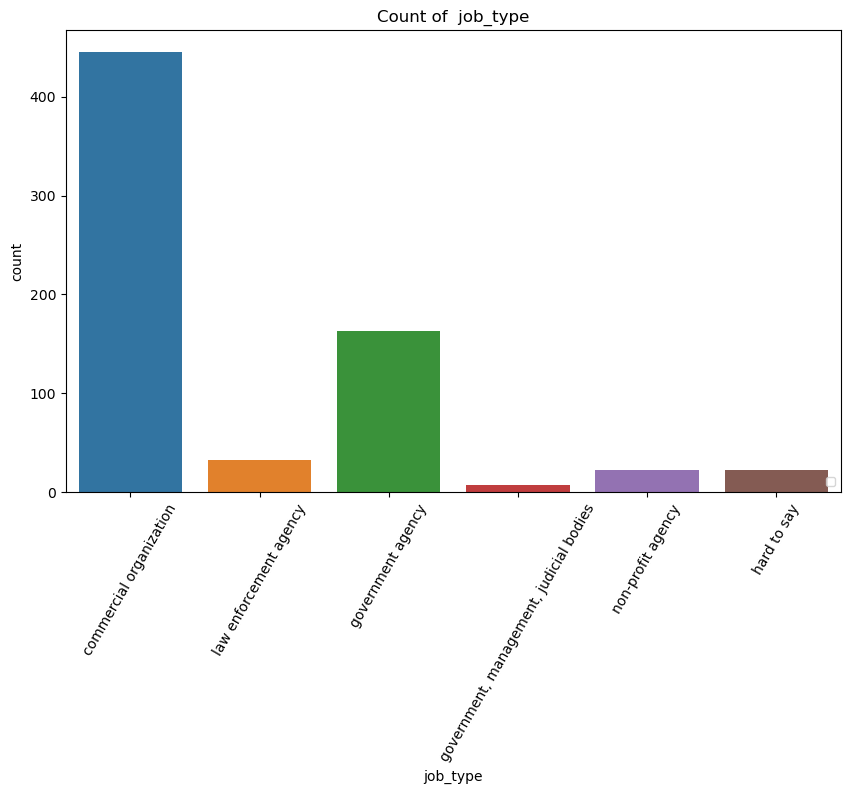

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


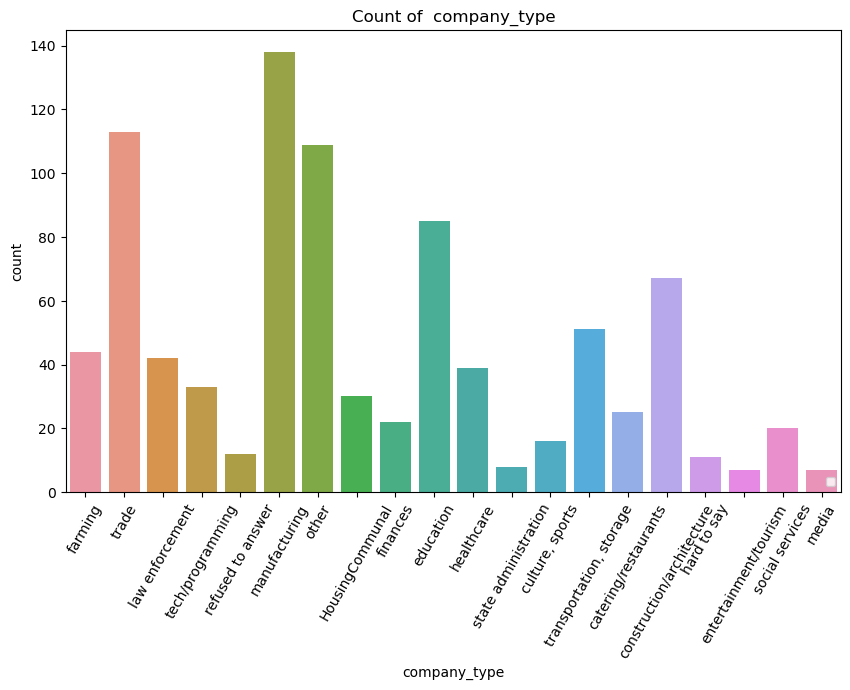

In [43]:
# Working with Char variables

char_columns = df.select_dtypes(include=['object']).drop(columns = ['id'])

for var in char_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=var, data=df)
    plt.title(f'Count of  {var}')
    plt.legend(loc='lower right', fontsize='small')
    plt.xticks(rotation=60)
    plt.show()


In [14]:
df.columns

Index(['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type',
       'company_type', 'weight1', 'age_bin'],
      dtype='object')

In [24]:
df.isnull().sum()


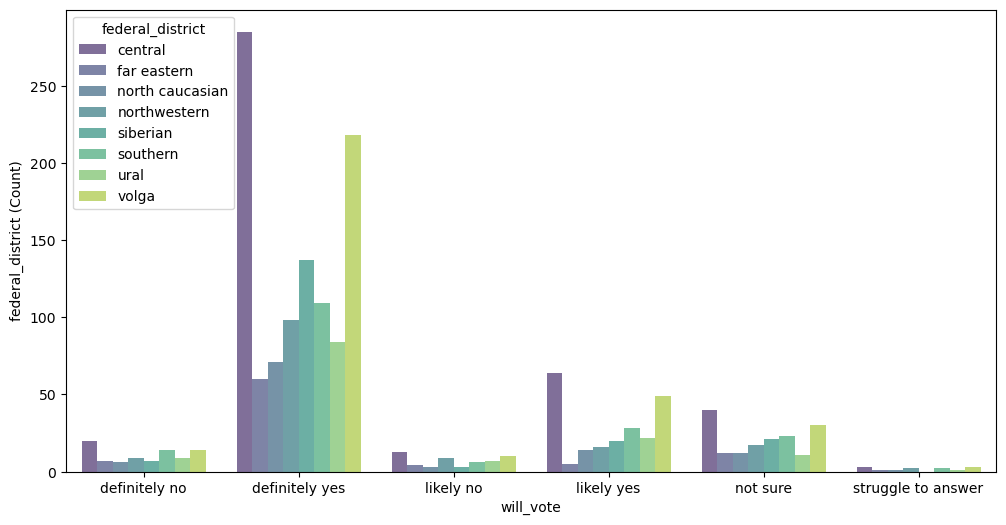

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
cancer_rate_by_smoking_and_alcohol_consuming = df.groupby(['will_vote', 'federal_district'])['id'].count().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=cancer_rate_by_smoking_and_alcohol_consuming, x='will_vote', y='count', hue='federal_district', palette='viridis', alpha=0.7)

# Adding title and labels
plt.xlabel('will_vote')
plt.ylabel('federal_district (Count)')
plt.show()


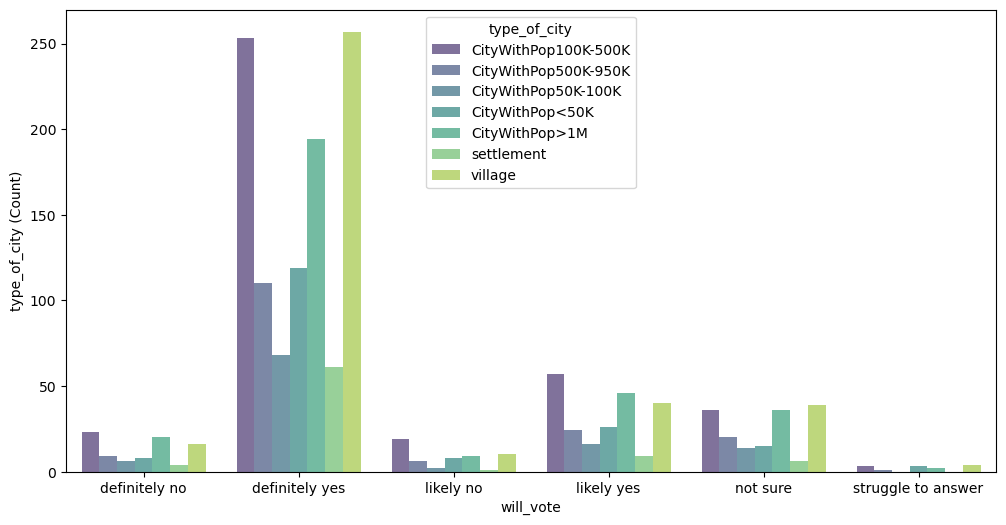

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
cancer_rate_by_smoking_and_alcohol_consuming = df.groupby(['will_vote', 'type_of_city'])['id'].count().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=cancer_rate_by_smoking_and_alcohol_consuming, x='will_vote', y='count', hue='type_of_city', palette='viridis', alpha=0.7)

# Adding title and labels
plt.xlabel('will_vote')
plt.ylabel('type_of_city (Count)')
plt.show()


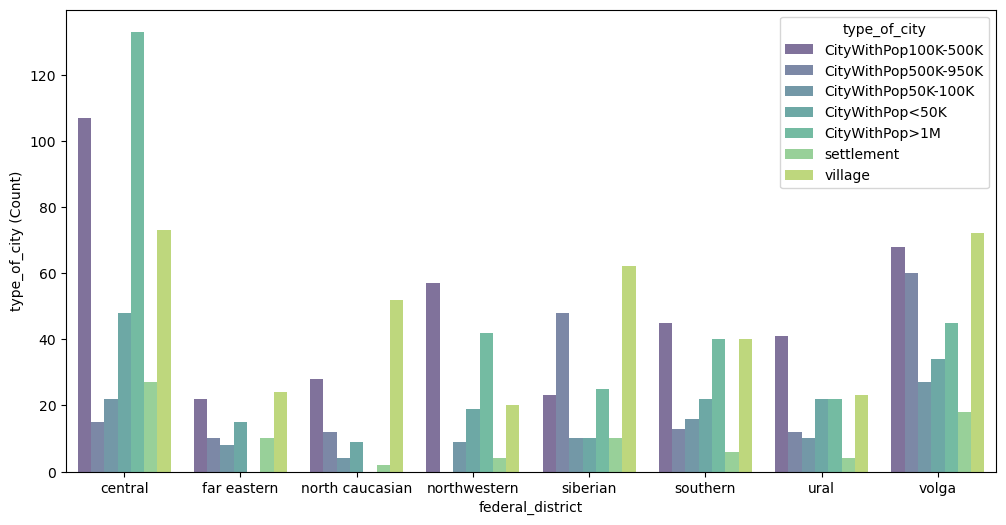

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
cancer_rate_by_smoking_and_alcohol_consuming = df.groupby(['federal_district', 'type_of_city'])['id'].count().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=cancer_rate_by_smoking_and_alcohol_consuming, x='federal_district', y='count', hue='type_of_city', palette='viridis', alpha=0.7)

# Adding title and labels
plt.xlabel('federal_district')
plt.ylabel('type_of_city (Count)')
plt.show()


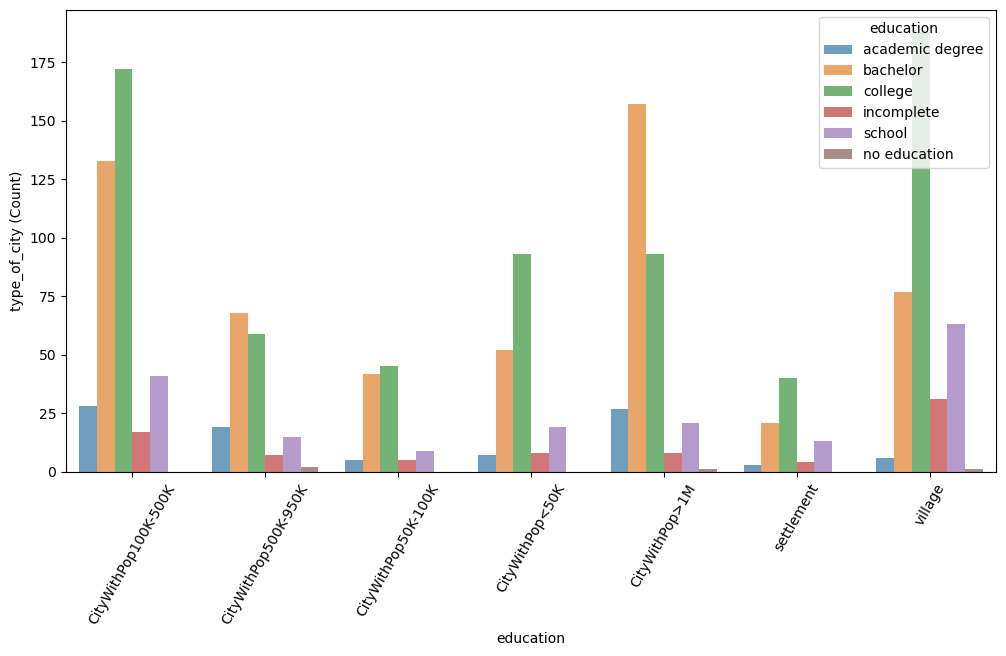

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
cancer_rate_by_smoking_and_alcohol_consuming = df.groupby(['type_of_city', 'education'])['id'].count().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=cancer_rate_by_smoking_and_alcohol_consuming, x='type_of_city', y='count', hue='education',  alpha=0.7)

# Adding title and labels
plt.xlabel('education')
plt.ylabel('type_of_city (Count)')
plt.xticks(rotation = 60)
plt.show()


#### People in the village have done there last eductaion in mostly School & college or they have incompelete or no education 

#### As we go to mega cities theie mostly people are highly educated like bachelors 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


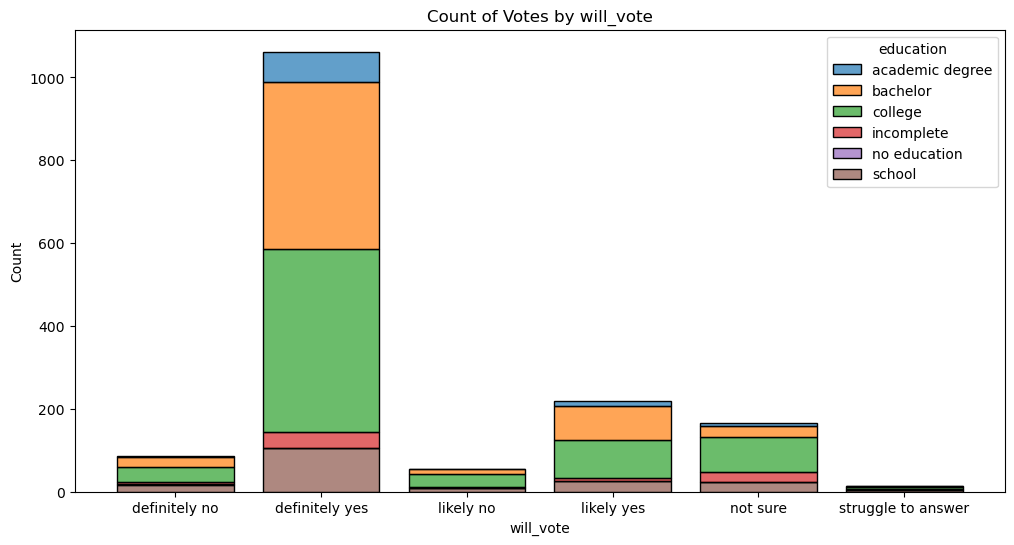

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

cancer_rate_by_smoking_and_alcohol_consuming = df.groupby(['will_vote', 'education'])['id'].count().reset_index(name='count')


plt.figure(figsize=(12, 6))
sns.histplot(
    data=cancer_rate_by_smoking_and_alcohol_consuming, 
    x='will_vote', 
    weights='count', 
    hue='education', 
    multiple='stack', 
    shrink=0.8, 
    alpha=0.7
)

plt.title('Count of Votes by will_vote')
plt.xlabel('will_vote')
plt.ylabel('Count')
plt.show()


#### Educated people are more likely to vote than low/illetrate people

In [68]:
df.columns

Index(['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type',
       'company_type', 'weight1', 'age_bin', 'tag'],
      dtype='object')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


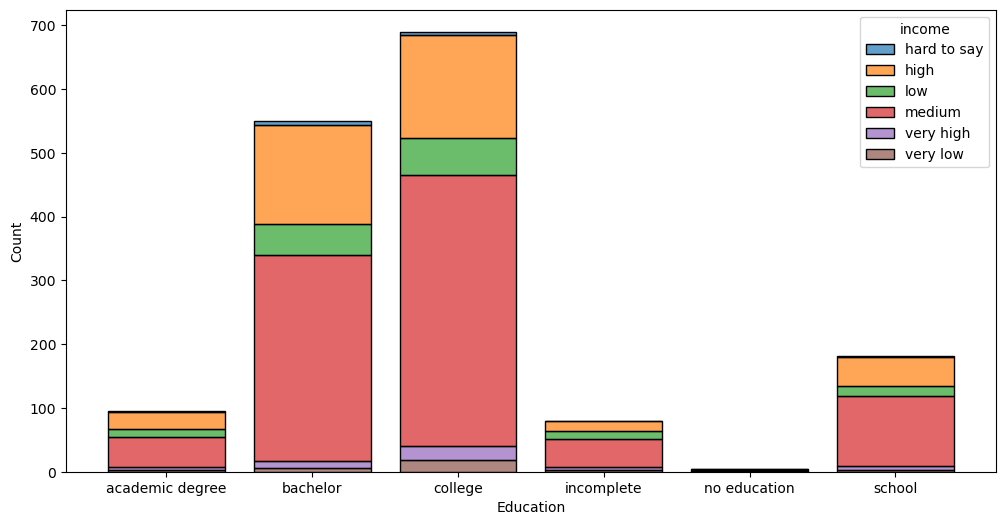

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

cancer_rate_by_smoking_and_alcohol_consuming = df.groupby(['education', 'income'])['id'].count().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.histplot(
    data=cancer_rate_by_smoking_and_alcohol_consuming, 
    x='education', 
    weights='count', 
    hue='income', 
    multiple='stack', 
    shrink=0.8, 
    alpha=0.7
)

plt.xlabel('Education')
plt.ylabel('Count')
plt.show()


#### People with higher education has more income & they are more likely to vote as well

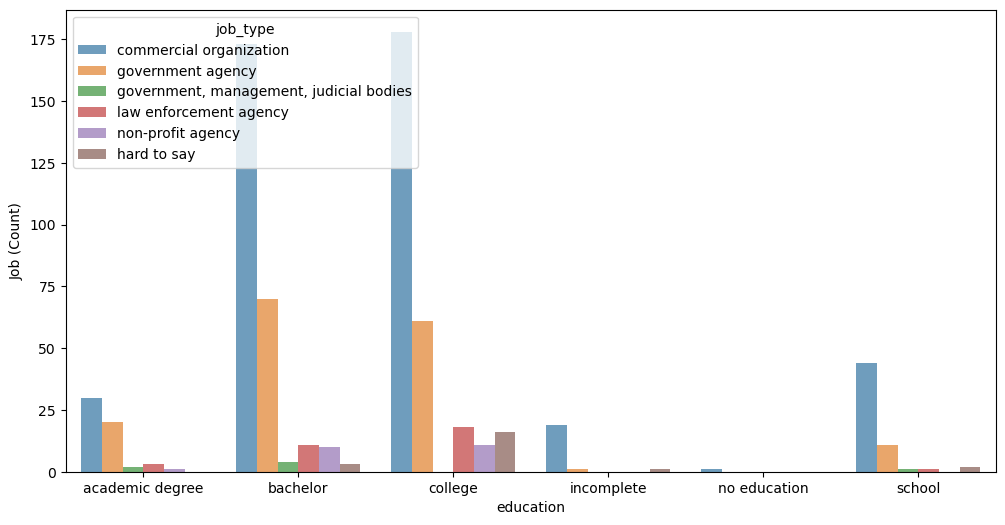

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
cancer_rate_by_smoking_and_alcohol_consuming = df.groupby(['education', 'job_type'])['id'].count().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=cancer_rate_by_smoking_and_alcohol_consuming, x='education', y='count', hue='job_type',  alpha=0.7)

# Adding title and labels
plt.xlabel('education')
plt.ylabel('Job (Count)')
plt.show()


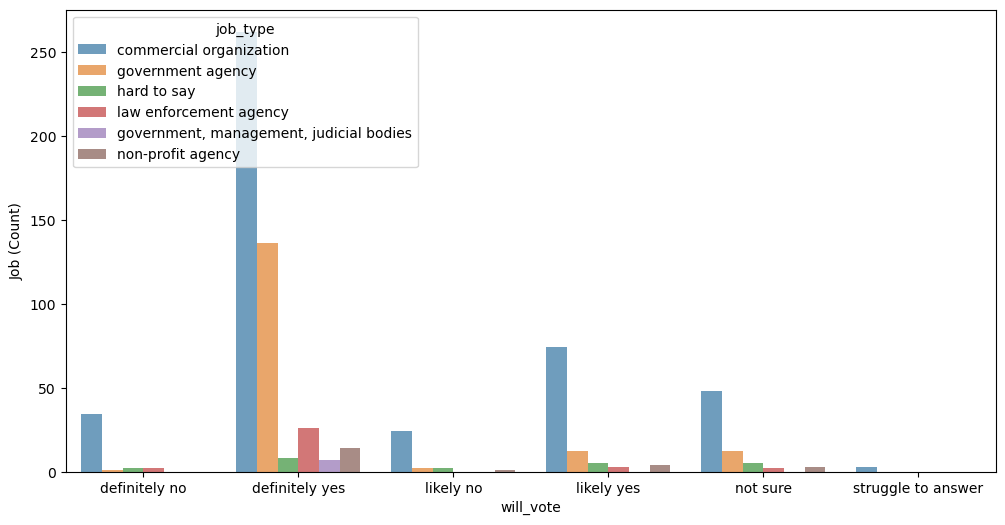

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
cancer_rate_by_smoking_and_alcohol_consuming = df.groupby(['will_vote', 'job_type'])['id'].count().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=cancer_rate_by_smoking_and_alcohol_consuming, x='will_vote', y='count', hue='job_type',  alpha=0.7)

# Adding title and labels
plt.xlabel('will_vote')
plt.ylabel('Job (Count)')
plt.show()


#### People who are highly educated, working for govt agencies are more like to vote than people with less education 

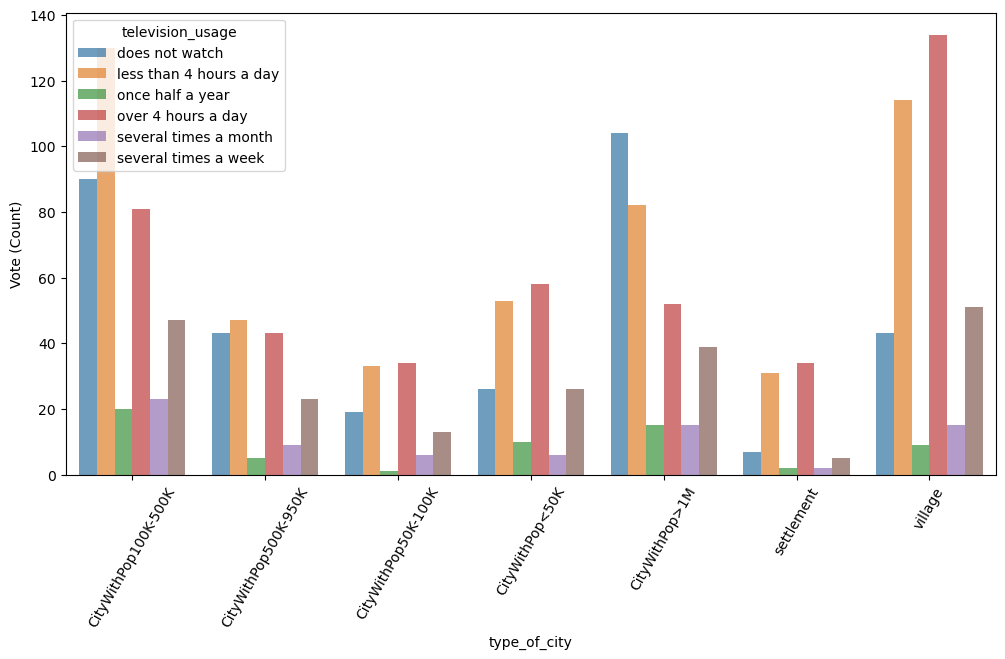

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
cancer_rate_by_smoking_and_alcohol_consuming = df.groupby(['type_of_city', 'television_usage'])['id'].count().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=cancer_rate_by_smoking_and_alcohol_consuming, x='type_of_city', y='count', hue='television_usage',  alpha=0.7)

# Adding title and labels
plt.xlabel('type_of_city')
plt.ylabel('Vote (Count)')
plt.xticks(rotation = 60)
plt.show()


#### People from village and small towns watch TV daily 

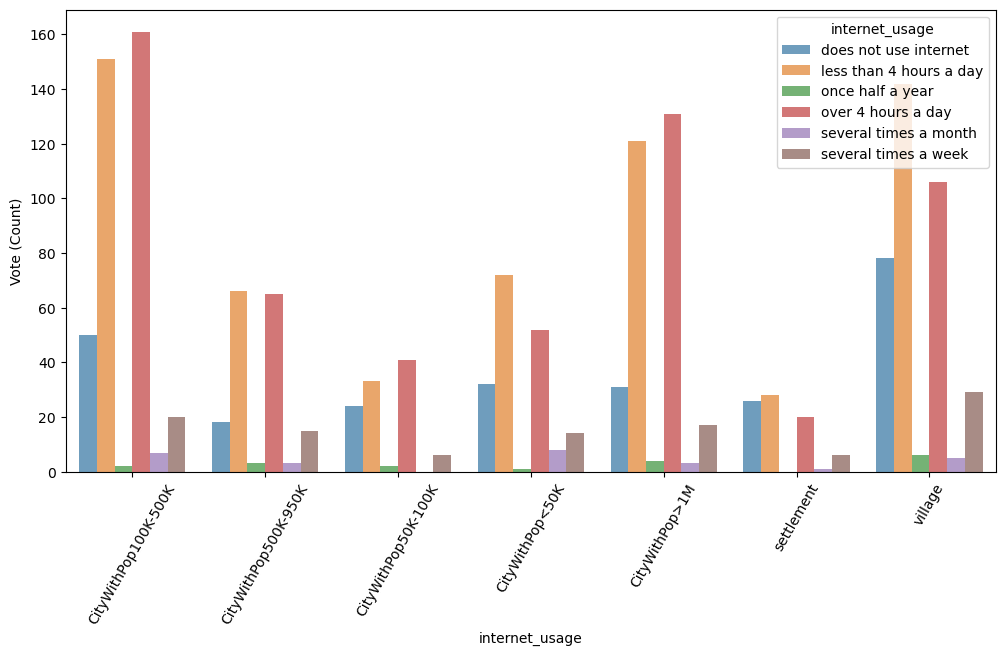

In [81]:
cancer_rate_by_smoking_and_alcohol_consuming = df.groupby(['type_of_city', 'internet_usage'])['id'].count().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=cancer_rate_by_smoking_and_alcohol_consuming, x='type_of_city', y='count', hue='internet_usage',  alpha=0.7)

# Adding title and labels
plt.xlabel('internet_usage')
plt.ylabel('Vote (Count)')
plt.xticks(rotation = 60)
plt.show()



#### People living in village have lower internet penetration than small town or urban people

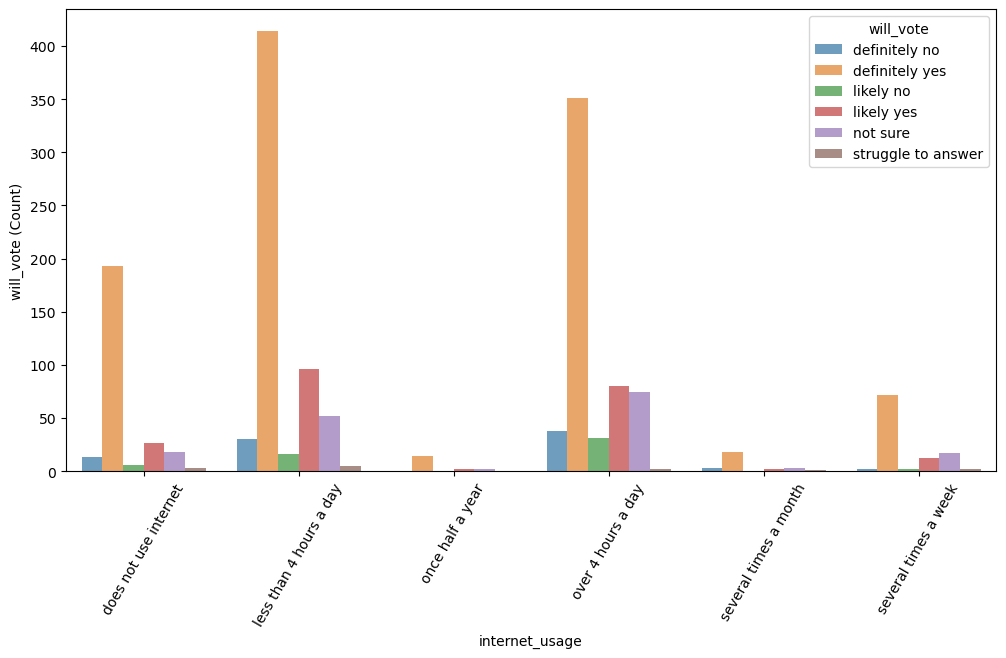

In [84]:
cancer_rate_by_smoking_and_alcohol_consuming = df.groupby(['internet_usage', 'will_vote'])['id'].count().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=cancer_rate_by_smoking_and_alcohol_consuming, x='internet_usage', y='count', hue='will_vote',  alpha=0.7)

# Adding title and labels
plt.xlabel('internet_usage')
plt.ylabel('will_vote (Count)')
plt.xticks(rotation = 60)
plt.show()



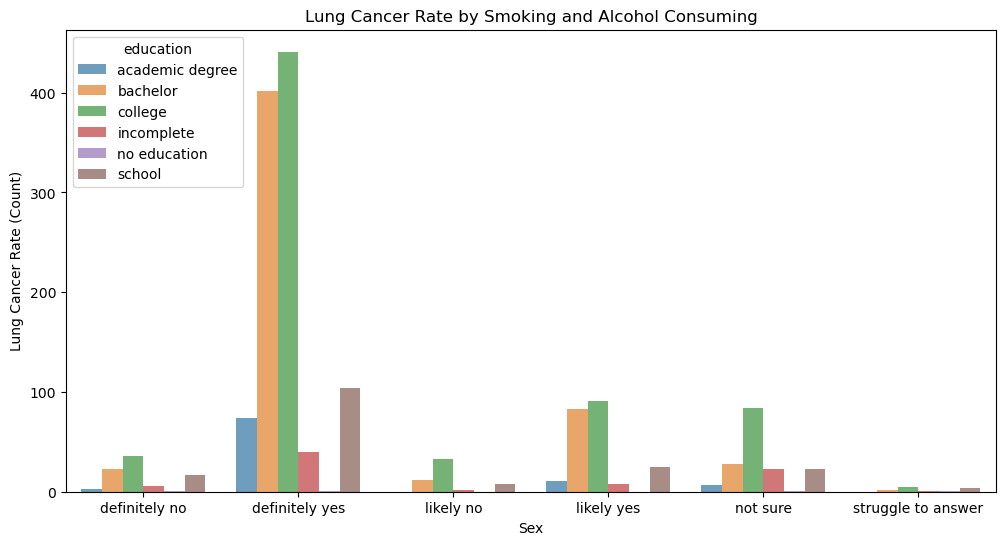

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
cancer_rate_by_smoking_and_alcohol_consuming = df.groupby(['will_vote', 'education'])['id'].count().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=cancer_rate_by_smoking_and_alcohol_consuming, x='will_vote', y='count', hue='education',  alpha=0.7)

# Adding title and labels
plt.title('Lung Cancer Rate by Smoking and Alcohol Consuming')
plt.xlabel('Sex')
plt.ylabel('Lung Cancer Rate (Count)')
plt.show()


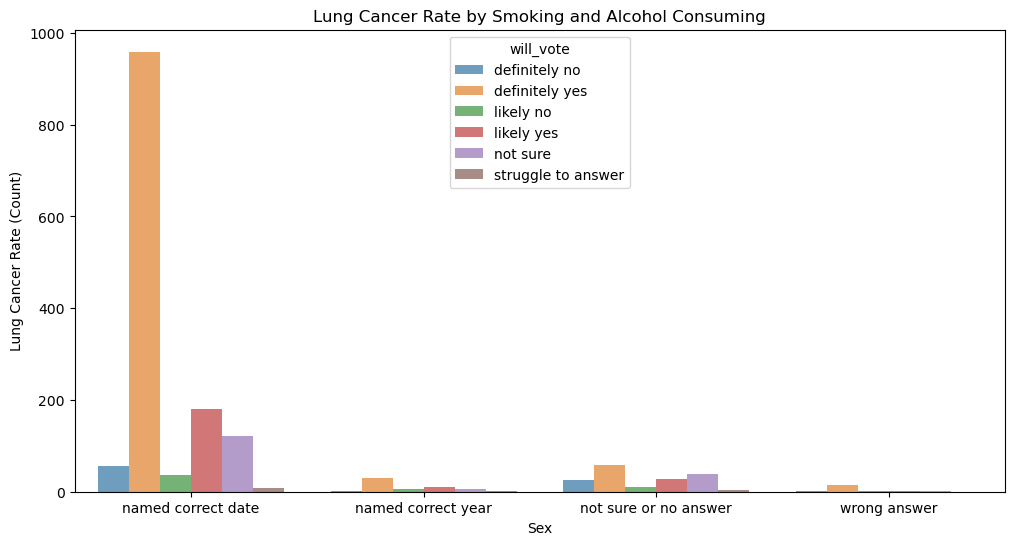

In [85]:

cancer_rate_by_smoking_and_alcohol_consuming = df.groupby(['knows_election_date', 'will_vote'])['id'].count().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=cancer_rate_by_smoking_and_alcohol_consuming, x='knows_election_date', y='count', hue='will_vote', alpha=0.7)

# Adding title and labels
plt.xlabel('knows_election_date')
plt.ylabel('will_vote (Count)')
plt.show()


#### People who follow the election will surely vote

## Final Insights

1. People with older age >60 affected by lung cancer have more symptoms of chest pain, ANXIETY, SHORTNESS_OF_BREATH & WHEEZING compared to young age people
2. People with young age 30-40 affected by lung cancer have more symptoms of coughfing issues, FATIGUE, Peer pressure & Yellow fingers compared to old age people
